In [25]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import zipfile
import os
import helper
import shutil
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py


--2021-01-04 22:26:34--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-01-04 22:26:34 (53.9 MB/s) - ‘helper.py.2’ saved [2813/2813]



In [ ]:
#Unzipped the folder into /content
#!unzip "/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats.zip" -d "/content/drive/MyDrive/dogs_vs_cats"

# Create subfolders for the two classes
#os.mkdir('/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/train/cat')
#os.mkdir('/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/train/dog')

#Move the images into the designated subfolders
#source = '/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/train'
#imageDir = os.listdir('/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/train')

# for name in imageDir:
#   if name[0] == 'c':
#      destination = '/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/train/cat'
#      shutil.move(os.path.join(source, name), destination)
#   else:
#      destination = '/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/train/dog'
#      shutil.move(os.path.join(source, name), destination)

# os.chdir('/content/dogs_vs_cats/test/images')
#Tried to make a subfolder for the test images in order to get past imageFolder bug
# os.mkdir('/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/test/images')
# source = '/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/test'
# imageDir = os.listdir('/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/test')
# for name in imageDir:
#   if name.endswith('.jpg'):
#      destination = '/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images/test/images'
#      shutil.move(os.path.join(source, name), destination)

In [ ]:
#Code for transforming and loading data
#This will output a random image from the training set!!

# data_dir = '/content/dogs_vs_cats/train'

# transform = transforms.Compose([transforms.Resize(255),
#                                 transforms.CenterCrop(224),
#                                 transforms.ToTensor()])

# dataset = datasets.ImageFolder(data_dir, transform=transform)
# dataloader = torch.utils.data.DataLoader(dataset,
#                                          batch_size=32,
#                                          shuffle=True)
# images, labels = next(iter(dataloader))
# helper.imshow(images[0], normalize=False)

In [35]:
data_dir = '/content/drive/MyDrive/dogs_vs_cats/dogs_vs_cats_images_small'

# train_transforms = transforms.Compose([transforms.RandomRotation(30),
#                                        transforms.RandomResizedCrop(224),
#                                        transforms.RandomHorizontalFlip(),
#                                        transforms.ToTensor()])
# test_transforms = transforms.Compose([transforms.Resize(255),
#                                       transforms.CenterCrop(224),
#                                       transforms.ToTensor()])

transform = transforms.Compose([transforms.Resize((256, 256)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder(data_dir + '/train', transform=transform)
test_data = datasets.ImageFolder(data_dir + '/test', transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True,batch_size=4)
testloader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=4)

classes = ('cat', 'dog')

In [ ]:
# data_iter = iter(trainloader)

# images,labels = next(data_iter)
# fig, axes = plt.subplots(figsize=(10,4), ncols=4)
# for ii in range(4):
#   ax = axes[ii]
#   helper.imshow(images[ii], ax=ax, normalize=False)
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
  

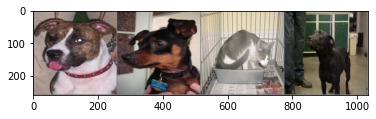

  dog   dog   cat   dog


In [36]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [57]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(4, 4)
    self.conv2 = nn.Conv2d(6, 10, 5)
    self.conv3 = nn.Conv2d(10, 16, 5)
    self.fc1 = nn.Linear(16 * 2 * 2, 32)
    self.fc2 = nn.Linear(32, 8)
    self.fc3 = nn.Linear(8, 2)

    # torch.Size([4, 3, 32, 32])
    # torch.Size([4, 6, 14, 14])
    # torch.Size([4, 16, 5, 5])
    # torch.Size([4, 400])
    # torch.Size([4, 120])
    # torch.Size([4, 84])
    # torch.Size([4, 2])

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    #print(x.size())
    x = x.view(-1, 16 * 2 * 2)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

net = Net()

In [66]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters()) # adam has "better" convergence properties

In [79]:
for epoch in range(10):
  for i, (inputs, labels) in enumerate(trainloader):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if i % 49 == 0:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss.item()))

print('Finished Training')

[1,     1] loss: 0.556
[1,    50] loss: 0.317
[1,    99] loss: 0.564
[1,   148] loss: 0.541
[1,   197] loss: 0.571
[1,   246] loss: 0.565
[1,   295] loss: 0.348
[2,     1] loss: 0.377
[2,    50] loss: 0.577
[2,    99] loss: 0.428
[2,   148] loss: 0.317
[2,   197] loss: 0.719
[2,   246] loss: 0.590
[2,   295] loss: 0.558
[3,     1] loss: 0.316
[3,    50] loss: 0.322
[3,    99] loss: 0.321
[3,   148] loss: 0.540
[3,   197] loss: 0.669
[3,   246] loss: 0.541
[3,   295] loss: 0.554
[4,     1] loss: 0.329
[4,    50] loss: 0.498
[4,    99] loss: 0.607
[4,   148] loss: 0.376
[4,   197] loss: 0.317
[4,   246] loss: 0.570
[4,   295] loss: 0.544
[5,     1] loss: 0.313
[5,    50] loss: 0.396
[5,    99] loss: 0.324
[5,   148] loss: 0.315
[5,   197] loss: 0.331
[5,   246] loss: 0.570
[5,   295] loss: 0.367
[6,     1] loss: 0.317
[6,    50] loss: 0.336
[6,    99] loss: 0.314
[6,   148] loss: 1.062
[6,   197] loss: 0.315
[6,   246] loss: 0.316
[6,   295] loss: 0.313
[7,     1] loss: 0.343
[7,    50] 

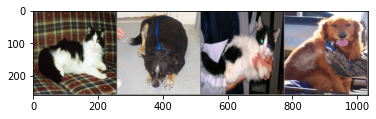

GroundTruth:    cat   dog   cat   dog


In [80]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [81]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))


Predicted:    cat   cat   cat   dog


In [82]:
correct = 0
total = 0
with torch.no_grad():
    for (images, labels) in testloader:
        outputs = net(images)
        predicted = torch.argmax(outputs, 1)
        total += labels.size(0)
        correct += torch.sum(predicted == labels)

print('Accuracy of the network on the 100ish test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 100ish test images: 70 %


In [73]:
correct = 0
total = 0
with torch.no_grad():
    for i, (images, labels) in enumerate(testloader):
        outputs = net(images)
        #print(outputs, outputs.size())
        predicted = torch.argmax(outputs, 1)
        print(predicted, predicted.size())
        total += labels.size(0)
        print(labels, labels.size())
        print(predicted==labels)
        print(torch.sum(predicted==labels))
        correct += torch.sum((predicted == labels))
        print('NEXT')
        if i > 3:
          break

print('Accuracy of the network on the 100ish test images: %d %%' % (
    100 * correct / total))

tensor([0, 0, 1, 1]) torch.Size([4])
tensor([0, 0, 0, 0]) torch.Size([4])
tensor([ True,  True, False, False])
tensor(2)
NEXT
tensor([1, 1, 1, 0]) torch.Size([4])
tensor([1, 1, 1, 1]) torch.Size([4])
tensor([ True,  True,  True, False])
tensor(3)
NEXT
tensor([1, 1, 1, 1]) torch.Size([4])
tensor([1, 0, 0, 1]) torch.Size([4])
tensor([ True, False, False,  True])
tensor(2)
NEXT
tensor([1, 1, 1, 0]) torch.Size([4])
tensor([1, 0, 1, 1]) torch.Size([4])
tensor([ True, False,  True, False])
tensor(2)
NEXT
tensor([1, 0, 1, 1]) torch.Size([4])
tensor([1, 0, 0, 0]) torch.Size([4])
tensor([ True,  True, False, False])
tensor(2)
NEXT
Accuracy of the network on the 100ish test images: 55 %
